In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from matplotlib import font_manager,rc
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')
    
%matplotlib inline

In [ ]:
# 음수기호가 깨지는 현상 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 주성분 분석(PCA)

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


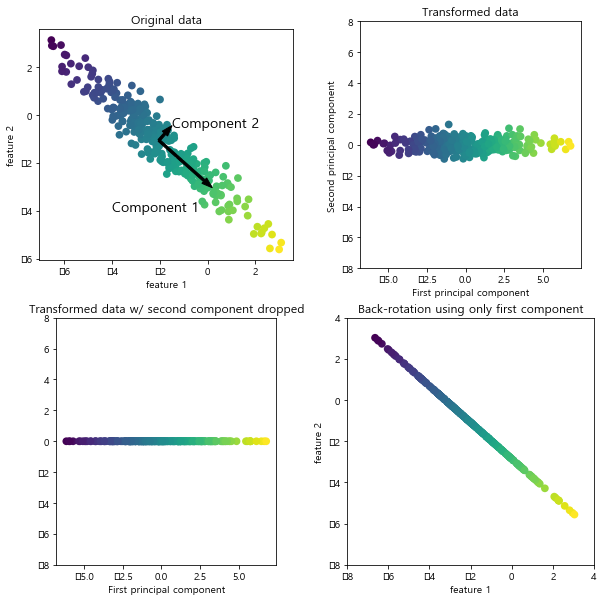

In [3]:
mglearn.plots.plot_pca_illustration()

### 첫 번째 그래프 :
component 1이라는 분산이 가장 큰 방향을 찾는다. 이 방향이 데이터에서 가장 정보를 많이 담고 있는 방향이다. 다른 말로는 상관관계가 가장 큰 방향<br>
componennt 2는 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다. 그림에 나타난 2차원에서는 직각인 방향이 하나 뿐이지만 고차원에서는 무한히 많은 직각방향이 있을 수 있다.<br>
화살표의 머리나 꼬리는 아무 의미는 없음

이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라 해서 주성분(principal component)라고 한다. 일반적으로 원본 특성의 개수만큼의 주성분이 있다.<br>
### 두 번째 그래프 :
첫 째 그래프와 동일하지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것이다. 회전 이전에 데이터에서 평균을 빼 중심을 원점에 맞추었다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 상관관계 행렬(correlation matix)이 대각선 방향을 제외하고는 0이 된다.(상관관계 행렬은 공분산 행렬을 정규화한 것, 대각성분은 당연히 1이다.)
### 세 번째 그래프 :
PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다. 세 번째 그래프는 첫 번째 주성분만 유지하려고 하는 경우. 이렇게 하면 2차원 데이터가 1차원으로 감소한다. 단순히 원본 특성 중 하나만 남기는 것이 아니라 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것
### 네 번째 그래프 : 
세 번째 그래프의 데이터에 다시 평균을 더하고 반대로 회전한 것. 이 포인터들은 원래 특성 공간에 모여있지만 첫 번째 주성분의 정보만 담고 있다. 이 변환은 데이터에서 노이즈를 제거하고나 주성분에서 유지되는 정보를 시각화하는데 종종 사용된다,

## PCA를 적용해 유방암 데이터셋 시각화하기
PCA가 널리 사용되는 분야는 고차원 데이터셋의 시각화. 4개 정도의 특성이면 iris처럼 산점도 행렬을 그릴 수 있으나 유방암 데이터셋의 특성은 30개라 435개의 산점도를 그려야하므로 이해는커녕 자세히 들여다보기도 힘들다.

일단 조금 간단한 방법은 양성과 악성 두 클래스에 대해 각 특성 히스토그램을 그리는 것

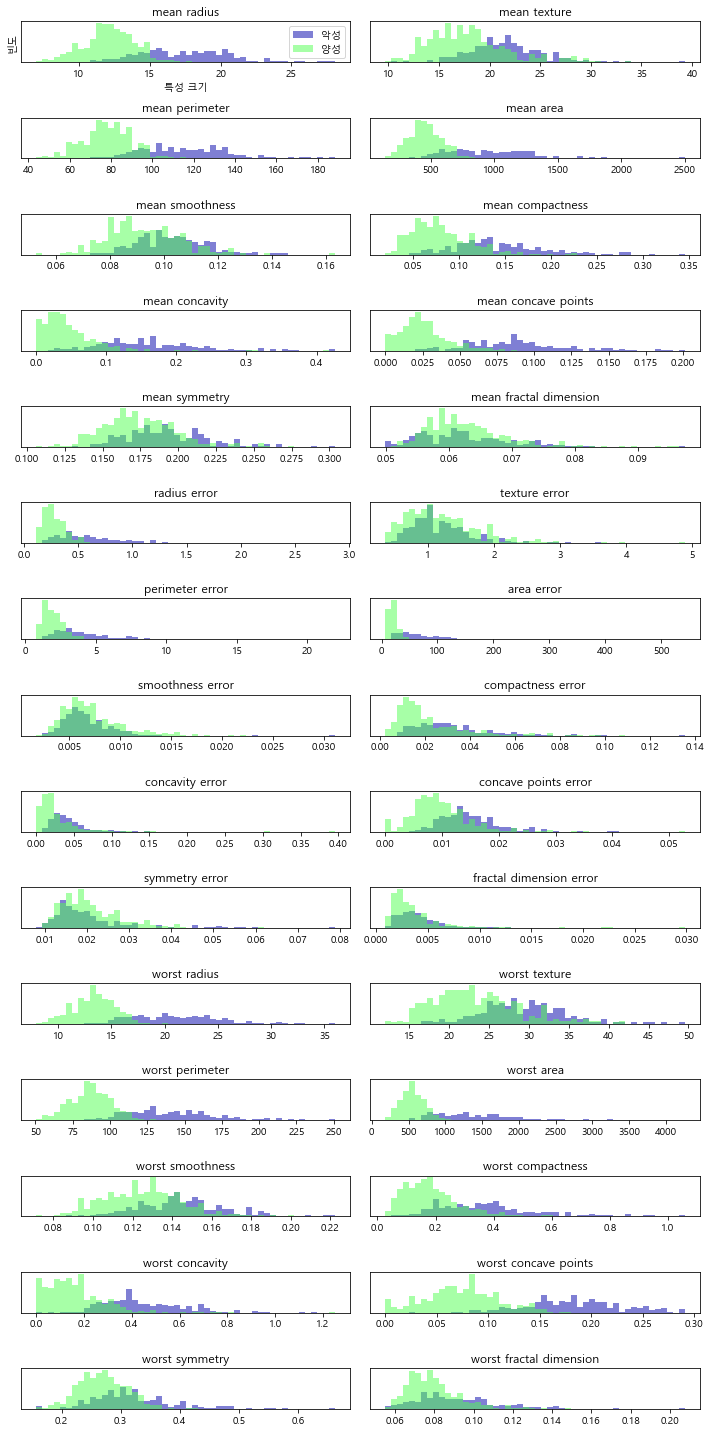

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig,axes = plt.subplots(15,2,figsize=(10,20))
maligant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(maligant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(['악성','양성'],loc='best')
fig.tight_layout()

이 그래프는 각 특성에 따라 양성과 악성이 잘 구분되는지를 보여줄 수는 있으나 특성 간 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다. PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들 수 있다. 

In [5]:
# PCA 적용 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 맞춰야한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA

# 기본값일 때는 PCA를 회전과 이동만 시키고 모든 주성분을 유지한다.
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)

In [7]:
X_scaled.shape

(569, 30)

In [8]:
X_pca.shape

(569, 2)

Text(0, 0.5, '두 번째 주성분')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


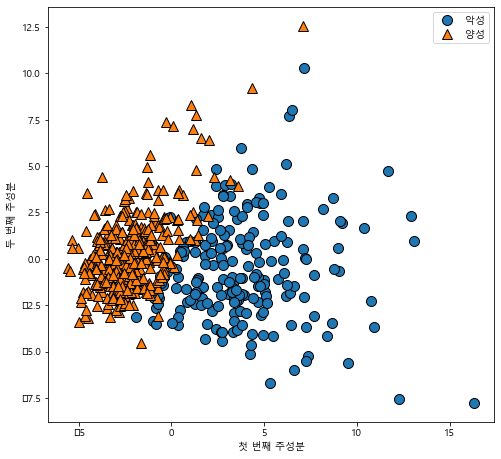

In [9]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(['악성','양성'],loc='best')
plt.gca().set_aspect("equal")
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

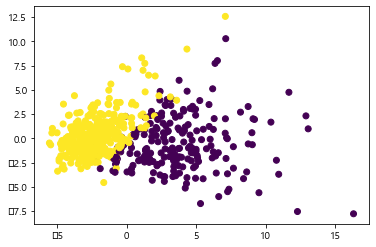

In [10]:
plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1],c=cancer.target)

PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점이다.<br>
주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. 이런 조합은 매우 복잡하다.

In [11]:
pca.components_.shape

(2, 30)

In [34]:
# 두 개의 주성분이 각 특성들을 조합할 때의 단위 기저(계수로 이해해도 ok)
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [33]:
(pca.components_**2).sum(axis=1)

array([1., 1.])

각 행은 주성분 하나싹을 나타내며 중요도에 따라 정렬되어 있다.(맨 처음 주성분이 가장 위에 나타난다.)<br>
열은 원본 데이터의 특성에 대응하는 값이다.

### 히트맵으로 시각화

Text(0, 0.5, '주성분')

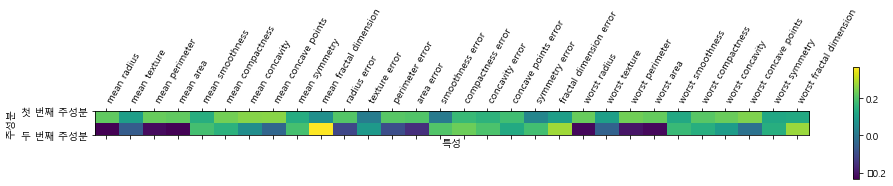

In [26]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['첫 번째 주성분','두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("특성")
plt.ylabel('주성분')

첫 번째 주성분의 모든 특성은 부호가 같다. 양수냐 음수냐는 아무 의미가 없지만 모든 특성 사이에 공통의 상호관계가 있다는 의미. 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 것이다.

## 고유얼굴(eigenface) 특성 추출
PCA는 특성 추출에도 이용한다. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수도 있다.

이미지는 적색,녹색,청색(RGB)의 강도가 기록된 픽셀로 구성된다. 보통 이미지 안의 물체는 수천개의 픽셀로 이루어지며 함께 모여 있을 때 의미가 있다. 

PCA를 이용해 LFW 데이터셋의 얼굴 이미지에서 특성을 추출하는 간단한 어플을 만들어보자. 처리속도를 높이기 위해 흑백 이미지를 사용하고 스케일을 줄였다.

In [37]:
from sklearn.datasets import fetch_lfw_people

In [38]:
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)

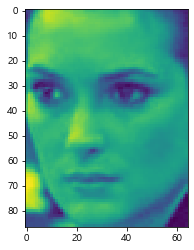

In [57]:
plt.imshow(people.images[0])

In [63]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

In [41]:
people.images.shape

(3023, 87, 65)

In [45]:
image_shape = people.images[0].shape
image_shape

(87, 65)

In [55]:
# 참고
print(len(np.max(people.images,axis=0)))
print(np.max(people.images,axis=0))

87
[[254.      254.33333 253.66667 ... 254.66667 255.      255.     ]
 [254.66667 254.33333 254.33333 ... 254.66667 255.      255.     ]
 [254.33333 254.      253.66667 ... 254.66667 255.      255.     ]
 ...
 [255.      254.66667 254.      ... 254.33333 254.      255.     ]
 [255.      255.      254.66667 ... 255.      255.      255.     ]
 [255.      255.      254.      ... 255.      255.      255.     ]]


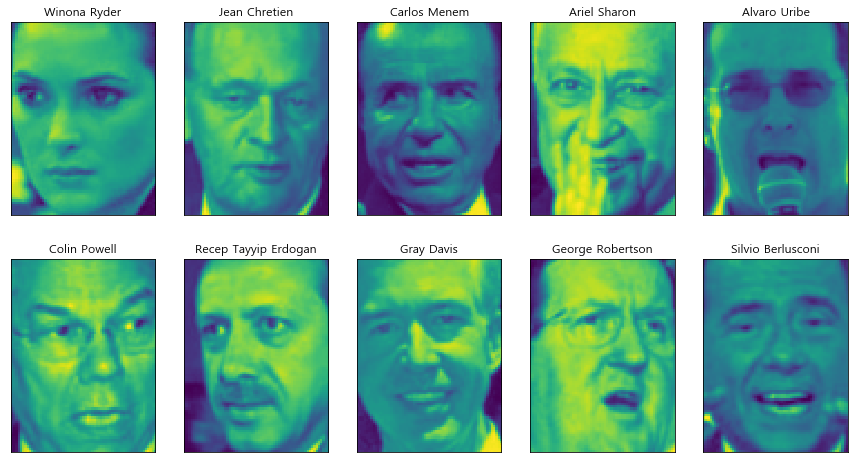

In [60]:
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})  # xlabel,ylabel 부분을 공란으로 만드는 역할
for target, image, ax in zip(people.target,people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [70]:
people.target_names.shape

(62,)

총 62명의 얼굴이 있다. 하지만 해당 데이터는 아래와 같이 조지 부시나 콜린 파웰의 이미지가 굉장히 많듯 편중되어있다.

In [92]:
names = pd.DataFrame(np.array([people.target,people.target_names[people.target]]).T)
names

,0,1
0,61,Winona Ryder
1,25,Jean Chretien
2,9,Carlos Menem
3,5,Ariel Sharon
4,1,Alvaro Uribe
...,...,...
3018,22,Igor Ivanov
3019,14,George W Bush
3020,14,George W Bush
3021,15,Gerhard Schroeder


In [93]:
names[1].value_counts()

George W Bush        530
Colin Powell         236
Tony Blair           144
Donald Rumsfeld      121
Gerhard Schroeder    109
                    ... 
Igor Ivanov           20
Angelina Jolie        20
Michael Bloomberg     20
Paul Bremer           20
Jiang Zemin           20
Name: 1, Length: 62, dtype: int64

In [96]:
# numpy의 bincount를 이용해서 집계할 수도 있음
counts = np.bincount(people.target)
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

### 데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택
(이렇게 하지 않으면 조지 부시의 이미지에 치우친 특성이 추출된다.)

In [107]:
# 이해용, 전체 과정과는 상관 없음
print(np.where(people.target == 61))
print(mask[np.where(people.target == 61)])

(array([   0,   34,  280,  299,  365,  474,  484,  681,  755,  778,  809,
        908, 1077, 1317, 1369, 1424, 1477, 1548, 1717, 1758, 2474, 2676,
       2698, 2718], dtype=int64),)
[False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [117]:
mask = np.zeros(people.target.shape,dtype=np.bool)   # 3023개 길이의 array
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1  # 각각의 target들을 같은 비중으로 최대 50개까지만 선택

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정
X_people = X_people/255

각 사람들 다른 클래스로 구분하는 분류기를 만들 수도 있다. 하지만 얼굴 데이터베이스에는 사람의 수가 많은반면, 각 사람에 대한 이미지는 적으므로 훈련 데이터가 너무 적은 문제가 발생할 수 있다. 이런 문제로 대부분의 분류기를 훈련시키기는 어렵다. 그리고 대규모의 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수 있어야한다.

간단한 방법으로 분류하려는 얼굴과 가장 비슷한 얼굴을 찾아내는 1-최근접 이웃 분류기를 사용할 수 있으나 아래에서 보듯 성능이 매우 좋지 않다.(시간도 오래 걸린다.)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify = y_people,random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.23255813953488372

무작위로 분류하는 1.6% (1/62)보다는 낫지만 좋은 결과라고 할 수 없다. 그렇기에 PCA가 필요하다.

픽셀로 두 이미지를 비교할 때, 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교를 하는데 픽셀을 있는 그대로 비교해서는 사람의 얼굴 특징을 잡아내기 힘들다. 예를 들어 전체적으로 한 칸씩만 옆으로 이동해도 완전히 다른 얼굴로 인식할 수 있다.

PCA의 화이트닝(whitening,백색화) 옵션을 사용해서 주성분의 스케일이 같아지도록 조정한다. 화이트님 없이 변환 후 StandardScaler를 적용하는 것과 같음 

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


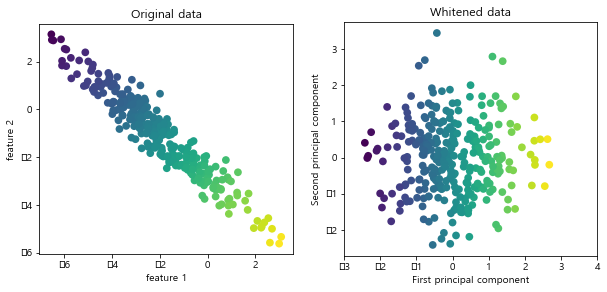

In [119]:
mglearn.plots.plot_pca_whitening()

In [123]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("원래 데이터는 5655개의 feature ", X_people.data.shape)
print("100개의 특성으로 줄임 ", X_train_pca.shape)

원래 데이터는 5655개의 feature  (2063, 5655)
100개의 특성으로 줄임  (1547, 100)


In [124]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
knn.score(X_test_pca,y_test)

0.312015503875969

정확도가 23%에서 31%로 크게 향상 되었으므로 주성분이 데이터를 더 잘 표현한다고 판단할 수 있다.

주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이다. 입력차원은 87x65픽셀의 흑백 이미지이고, 따라서 이 공간의 어떤 방향 역시 87x65의 어떤 이미지이다.

In [125]:
# 5655개를 어떻게 조합하느냐에 따라 pca 주성분이 결정되고 그 정보가 각 행마다 담겨있음
pca.components_.shape

(100, 5655)

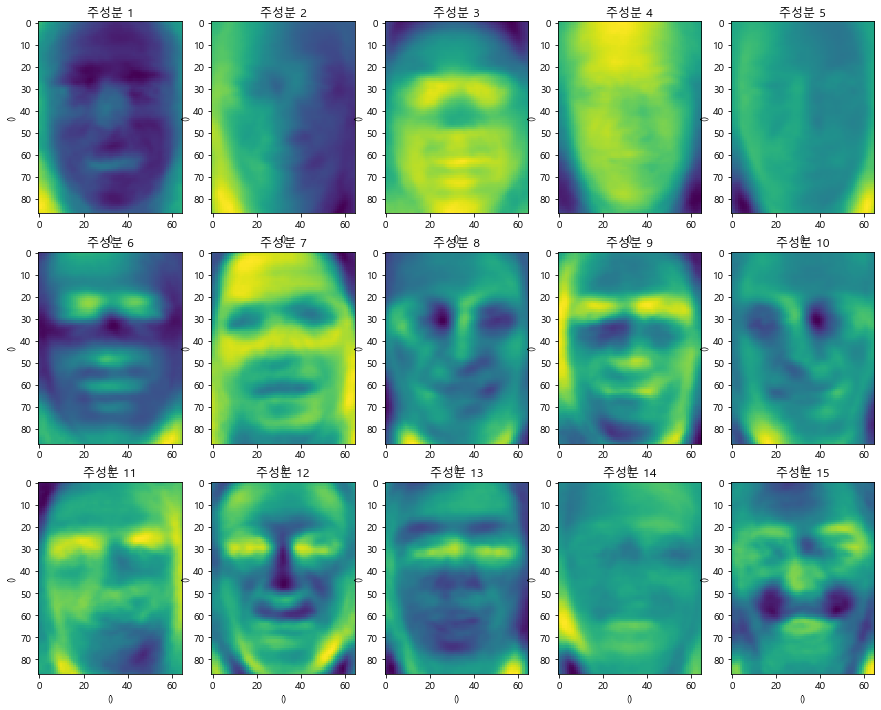

In [134]:
fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xlabel':(),'ylabel':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 {}".format(i+1))

각 주성분들이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있다.

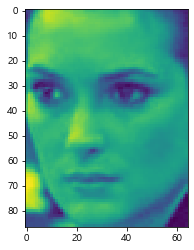

In [130]:
plt.imshow(people.images[0])

각 주성분들의 선형결합으로 원래 이미지가 형성된다.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.0s, 0.0min


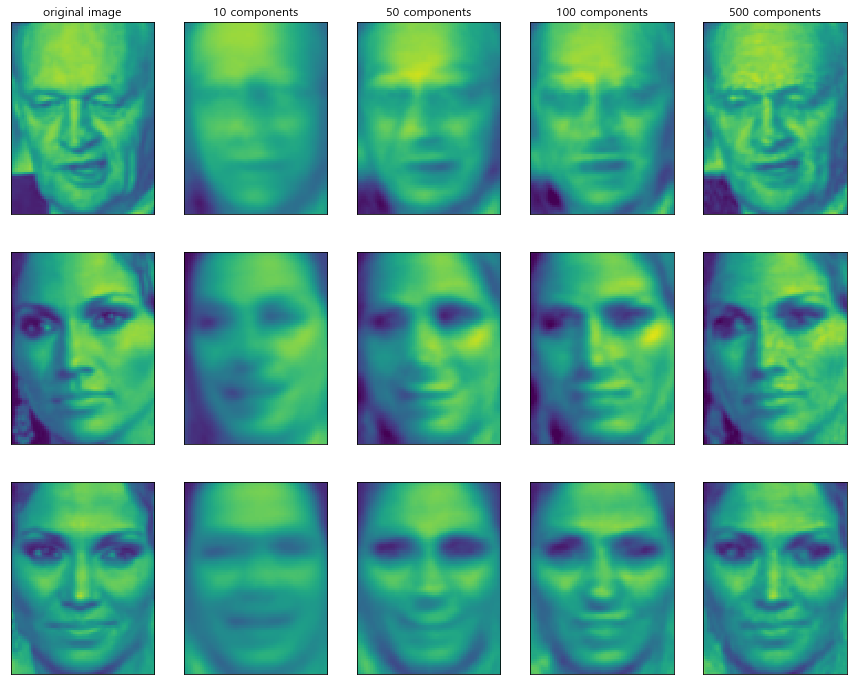

In [139]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, '두 번째 주성분')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


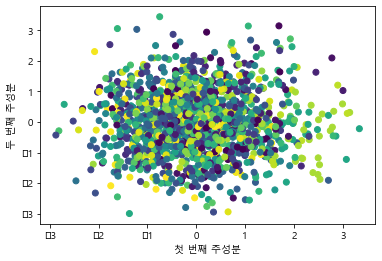

In [140]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

주성분을 두 개만 사용하면 전체 데이터가 한 덩어리로 뭉쳐있어 클래스가 잘 구분되지 않는다. <br>
위에서 10개의 주성분을 사용했을 때도 PCA는 얼굴의 아주 대략적인 특징만 잡았기 때문에 흐릿한 모양이 나오는 것

# 비음수 행렬 분해(NMF)
non-negative matrix factorization

PCA는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾는다. 즉 주성분과 계수가 모두 0보다 커야한다. 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.

여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이루어진 음악처럼 독립된 소스를 추가하여(덮어써서) 만들어진 데이터에 특히 유용하다. 이럴 때 NMF는 섞여 있는 데이터에서 원본 성분을 구성할 수 있다. 

음수로 된 성분이나 계수가 만드는 상쇄효과를 이해하기 어려운 PCA보다 대체로 NMF의 주성분이 해석하기 쉽다.

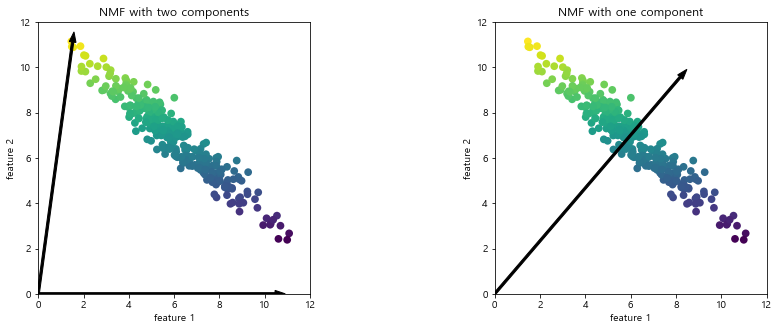

In [141]:
mglearn.plots.plot_nmf_illustration()

PCA와 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인을 해야한다. <br>
ie) 데이터가 원점 (0,0)에서 상대적으로 어디에 놓여있는지가 NMF에서 중요하다는 뜻이다.<br> 그렇기에 원점에서 데이터로 가는 방향을 추출한 것으로 음수 미포함 성분을 이해할 수 있다.

왼쪽 그림) 성분이 둘인 NMF로 데이터셋의 모든 포인트를 양수로 이뤄진 두 개의 성분으로 표현할 수 있다. 데이터를 완벽하게 재구성할 만큼 특성의 개수가 많다면, 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것이다.

오른쪽 그림) 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만든다. PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거되는 것뿐 아니라 전체 성분이 완전히 바뀐다. NMF에서 성분은 특정 방식으로 정렬되어있지 않아 모든 성분을 동등하게 취급한다.

NMF는 무작위로 초기화하므로 난수 생성 초기값에 따라 결과가 달라진다.

변환을 되돌릴 때는 PCA를 사용했을 때보다 품질이 조금 떨어진다.<br>
(mmglearn.plots.plot_nmf_faces(X_train,X_test,image_shape 코드를 쓰면 그림이 나오지만 컴퓨터 성능문제로 생략)<br>
PCA가 재구성 측면에서 최선의 방향을 찾는데 반해 NMF는 데이터에 있는 유용한 패턴을 찾는데 활용한다.

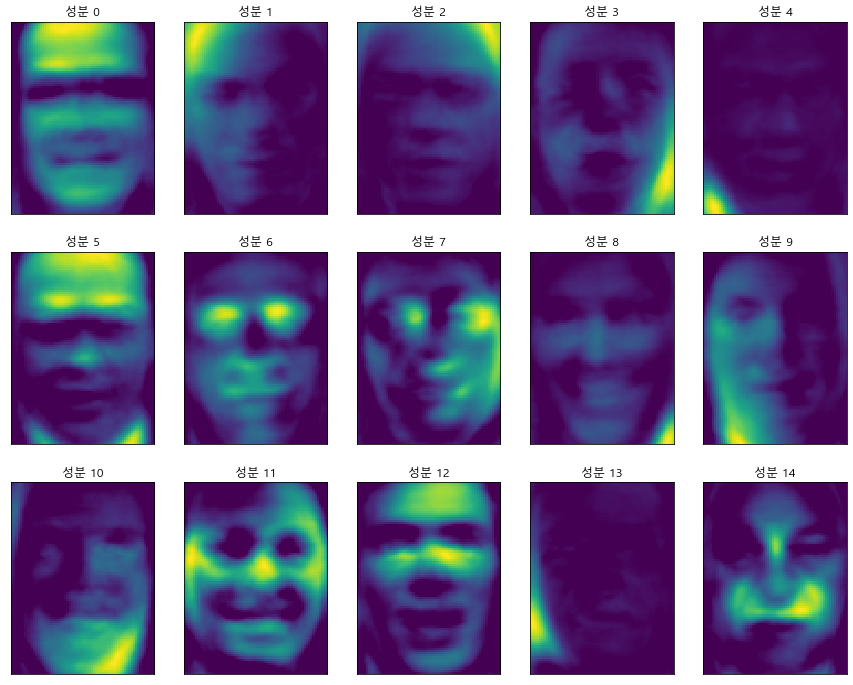

In [143]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

이 성분들은 모두 양수값이기 때문에 PCA 성분보다 훨씬 더 얼굴 원형처럼 보인다.

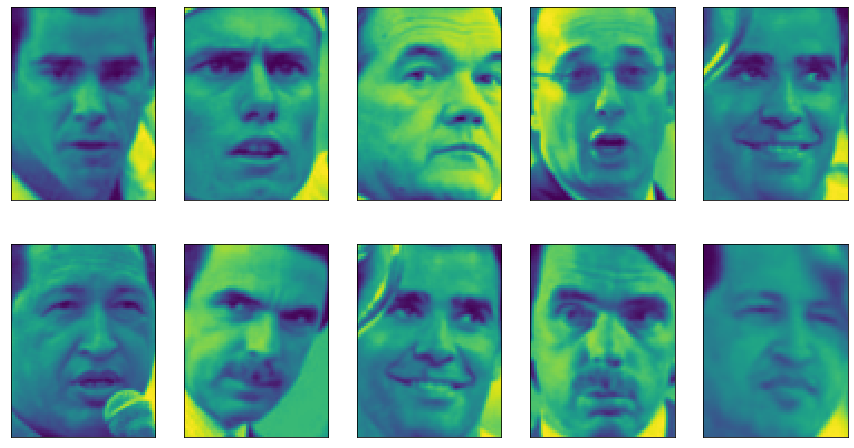

In [154]:
compn = 3
inds = np.argsort(X_train_nmf[:,compn])[::-1]   # compn번째 열을 기준으로 역순정렬 
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

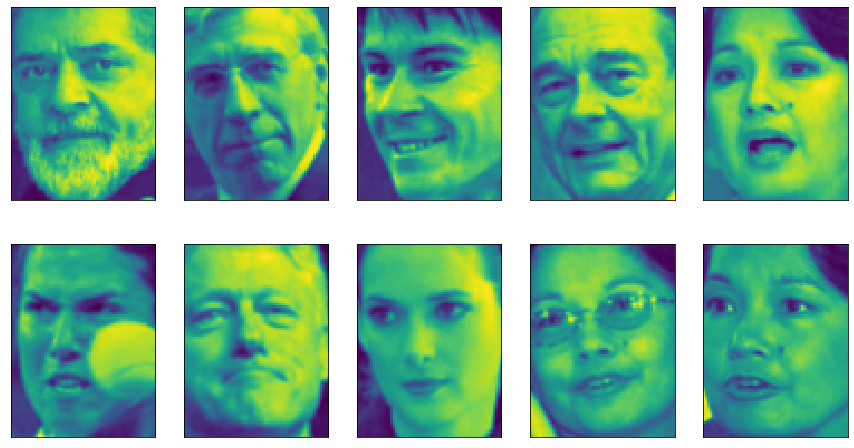

In [155]:
compn = 7
inds = np.argsort(X_train_nmf[:,compn])[::-1]   # compn번째 열을 기준으로 역순정렬 
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

NMF에서 성분 7에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가 있고, 성분 3에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아가 있다.

이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합하다.

Text(0, 0.5, '신호')

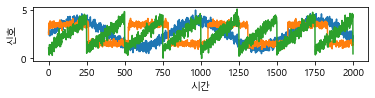

In [156]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("시간")
plt.ylabel("신호")

위 그림은 원본 신호체계이지만 관찰할 때는 세 개가 섞인 신호만 관찰할 수 있다. 그러므로 합쳐진 신호를 합쳐 원본 신호를 복원해야한다.<br>
이 신호를 여러 방법으로 관찰할 수 있고 각 장치는 일련의 측정 데이터를 제공한다 가정한다.

In [158]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)

print("측정 데이터 형태 : ",X.shape)

측정 데이터 형태 :  (2000, 100)


In [159]:
# NMF를 사용해 세 개의 신호를 복원

nmf = NMF(n_components=3,random_state=42)
S_ = nmf.fit_transform(X)
print("복원된 신호 데이터 형태 : ",S.shape)

복원된 신호 데이터 형태 :  (2000, 3)


In [160]:
# 비교를 위해 pca도 적용
pca  = PCA(n_components=3)
H = pca.fit_transform(X)

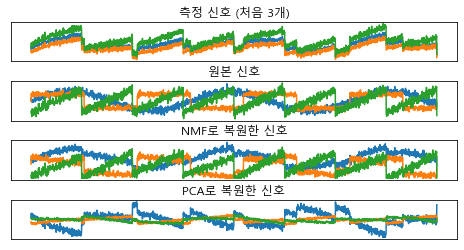

In [162]:
models=[X,S,S_,H]
names = ['측정 신호 (처음 3개)','원본 신호','NMF로 복원한 신호','PCA로 복원한 신호']

fig,axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})

for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

그림에서 보듯 NMF는 잘 복원, PCA는 데이터 변동의 대부분을 첫 번째(파란색) 성분을 사용해 나타냈다.<br>
NMF로 생성한 성분은 순서가 없다. 그림에서는 원본 신호와 순서가 같지만 우연의 일치일 뿐임

# t-SNE를 이용한 매니폴드 학습
매니폴드 학습 알고리즘이라고 하는 시각화 알고리즘은 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 그 중 t-SNE 알고리즘을 많이 사용한다.

해당 알고리즘은 시각화가 목적이라 3개 이상의 특성을 뽑지 않는다. t-SNE 알고리즘을 포함해 일부 매니폴드 알고리즘은 훈련데이터를 새로운 표현으로 변환시키지만 새 데이터에는 적용하지 못한다. 즉 테스트 세트에는 적용할 수 없다. 그런 관계로 탐색적 데이터 분석에는 유용하지만 지도 학습용으로는 거의 사용하지 않는다.

t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이다. <br>
먼저 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가장 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만든다. 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중은 둔다. 즉 이웃 데이터 포인트의 정보를 보존하려 노력한다.

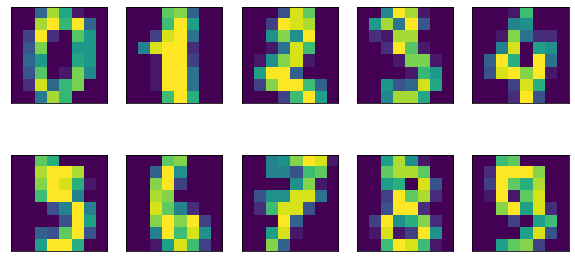

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

fig,axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})

for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

Text(0, 0.5, '두 번째 주성분')

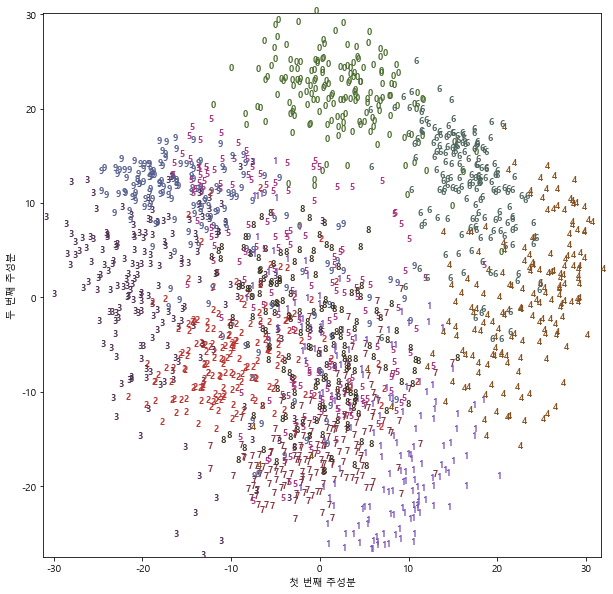

In [12]:
# PCA를 사용해 데이터를 2차원으로 축소

pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
# RGB 컬러
colors = ['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525',
         '#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그림
    # text 메서드에는 x좌표,y좌표,문자열 순으로 입력
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")


같은 데이터셋에 t-SNE를 적용해 비교. <br>새 데이터를 변환하지 않으므로 transform메서드가 없으나 모델을 만들자마자 변환해주는 fit_transform 메서드 사용가능

In [19]:
tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)

In [20]:
digits_tsne.shape

(1797, 2)

In [21]:
len(digits.data)

1797

Text(0, 0.5, 't-SNE 특성 1')

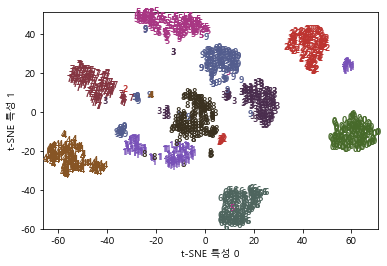

In [22]:
plt.figure()
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel('t-SNE 특성 1')

t-SNE 역시 매개변수가 있지만 대부분 기본값으로도 잘 동작하므로 생략